# Put Call Parity
- The put call parity is based on the law of one price where identical assets should be priced the same. The equation has been detailed below:   

Equation: C + x/(1 + rf)^t = P + S

Where   
C: Call Premium  
x: Strike Price  
rf: Risk Free Rate  
t: Time Until Expiration  
P: Put Premium  
S: Current Price of the Underlying Stock  

### Import Required Packages

In [1]:
import numpy_financial as np
from matplotlib import pyplot as plt

In [2]:
# Generate a list of potential stock values from which to estimate the resulting profit/loss
stock_price = [price for price in range(0,200,1)]

### Discovering the Call Premium Given the Put Premium

In [3]:
# Set specific variables
rf = 0.04
t = 1
current_price = 100
strike_price = 95
put_premium = 1

# Discover the call premium that satisfies the put call parity equation
call_premium = 0
while call_premium <= 1000:
    
    lhs = call_premium + np.pv(nper=t, pmt= -strike_price, rate=rf)
    rhs = put_premium + current_price
    
    if round(lhs,2) == round(rhs,2):
        call_option_premium_discovered = call_premium
        print('premium discovered')
            
    call_premium += 0.01

premium discovered


In [4]:
call_option_premium_discovered

9.649999999999839

In [5]:
# Verify that the left hand and right hand side of the equations are equal
lhs = call_option_premium_discovered + np.pv(nper=t, pmt= - strike_price, rate=rf)
print(round(lhs))
rhs = put_premium + current_price
print(round(rhs))

101


# Visualization of Two Combinations

In [7]:
# Specify the amount invested and the quantity of options in the contract
amount_invested = 10000
quantity = 100

### Long Stock Position

In [8]:
long_stock_profit = []

for price in stock_price:
    profit = quantity * (price - current_price)
    long_stock_profit.append(profit)

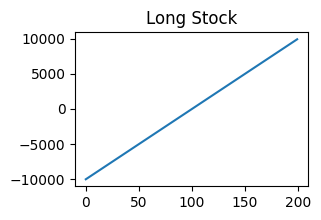

In [9]:
plt.figure(figsize = (3,2))
plt.title('Long Stock')
plt.plot(stock_price,long_stock_profit)

### Long Call Position

In [10]:
long_call_profit = []

for price in stock_price:
    profit = (price * quantity) - ((strike_price + call_option_premium_discovered) * quantity)
    
    max_cost = (quantity * call_option_premium_discovered) * -1
    
    if profit <= max_cost:
        long_call_profit.append(max_cost)
    else: long_call_profit.append(profit)

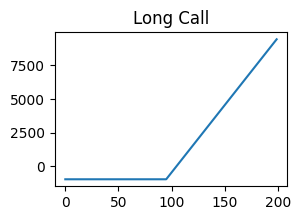

In [11]:
plt.figure(figsize = (3,2))
plt.title('Long Call')
plt.plot(stock_price,long_call_profit)

### Long Put Position

In [12]:
long_put_profit = []

for price in stock_price:
    profit = (strike_price * quantity) - ((price + put_premium) * quantity)
    
    max_loss = (quantity * put_premium) * -1
    
    if profit < max_loss:
        long_put_profit.append(max_loss)
    else: long_put_profit.append(profit)

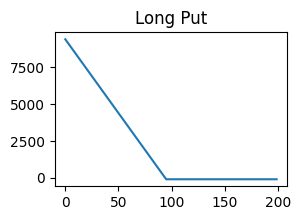

In [13]:
plt.figure(figsize = (3,2))
plt.title('Long Put')
plt.plot(stock_price,long_put_profit)

### Long Risk Free Position - rf estimated at 4.0%

In [14]:
long_rf_profit = []

for price in stock_price:
    profit = amount_invested * rf
    long_rf_profit.append(profit)

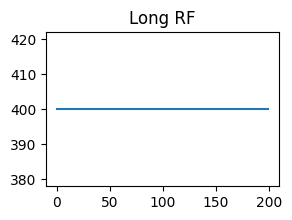

In [15]:
plt.figure(figsize = (3,2))
plt.title('Long RF')
plt.plot(stock_price,long_rf_profit)

# Combine and Verify Equivalence

A. Combine the long risk free position with the long call position  
B. Combine the long stock position with the long put position

In [16]:
combination_A = []

for i in range(0,len(stock_price),1):
    profit = long_rf_profit[i] + long_call_profit[i]
    
    combination_A.append(profit)
    
    
combination_B = []

for i in range(0,len(stock_price),1):
    profit = long_stock_profit[i] + long_put_profit[i]
    
    combination_B.append(profit)

### Visualize the Results

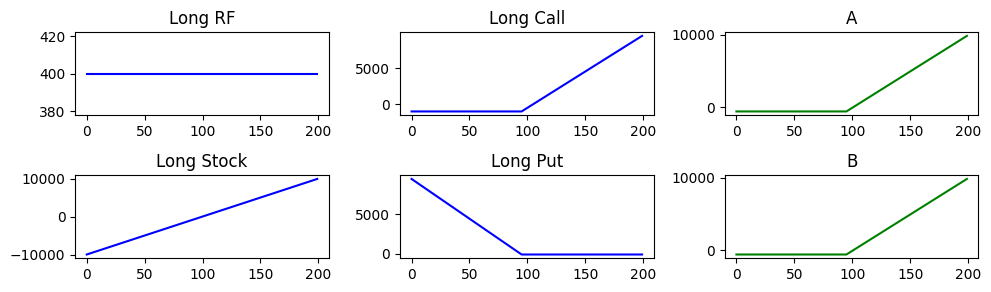

In [17]:
fig, ax = plt.subplots(2,3, figsize = (10,3))

ax[0,0].plot(stock_price,long_rf_profit, color = 'blue')
ax[0,0].set_title('Long RF')
ax[0,1].plot(stock_price,long_call_profit, color = 'blue')
ax[0,1].set_title('Long Call')
ax[0,2].plot(stock_price,combination_A, color = 'green')
ax[0,2].set_title('A')

ax[1,0].plot(stock_price,long_stock_profit, color = 'blue')
ax[1,0].set_title('Long Stock')
ax[1,1].plot(stock_price,long_put_profit, color = 'blue')
ax[1,1].set_title('Long Put')
ax[1,2].plot(stock_price,combination_A, color = 'green')
ax[1,2].set_title('B')

fig.tight_layout(pad = 1.0)

plt.show()